In [6]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from operator import attrgetter

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import warnings
warnings.filterwarnings("ignore")


# Verinin Okunması

In [9]:
#Verinin Okunması
df=pd.read_excel("TechKariyer.xlsx")

In [10]:
df.head()

,Login Dönemleri,Unnamed: 1,Unnamed: 2,Unnamed: 3,İlan Dönemleri,Unnamed: 5,Unnamed: 6,Unnamed: 7,Sözleşme Yenileme Dönemi,Unnamed: 9
0,Login Dönemi,Firma Kodu,Login Adet,NaN,İlan Dönemi,Firma Kodu,İlan Adet,NaN,Firma Kodu,Yenileme Dönemi
1,201908,207104,2,NaN,201907,9306,3,NaN,100152,202006
2,201910,32850,1,NaN,201904,11220,1,NaN,100188,202005
3,202002,211761,2,NaN,202002,13559,1,NaN,1102,202007
4,201912,107276,3,NaN,201903,192033,1,NaN,10127,202006


### Login Kayıtları

In [11]:
# Login Kayıtları
df_login_donem=df.iloc[1:,0:3]
df_login_donem.columns=["donem","Firma_kod","Login_adet"]
df_login_donem["Login_adet"]=df_login_donem["Login_adet"].astype(int)

In [12]:
# Tarihleri Perioda Çevirdim
df_login_donem["donem"]=df_login_donem["donem"].apply(lambda x: str(x)[0:4]+"-"+str(x)[4:]+"-"+"01")
df_login_donem["donem"]=pd.to_datetime(df_login_donem.donem).dt.to_period('m')

In [58]:
df_login_donem.head()

,donem,Firma_kod,Login_adet
1,2019-08,207104,2
2,2019-10,32850,1
3,2020-02,211761,2
4,2019-12,107276,3
5,2020-02,31690,6


In [14]:
# Firma Sayısı
df_login_donem["Firma_kod"].nunique()

62659

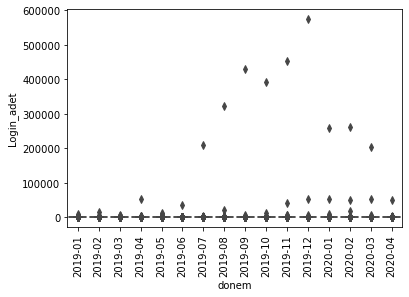

In [15]:
sns.boxplot("donem","Login_adet", data = df_login_donem.sort_values("donem"))
plt.xticks(rotation=90);

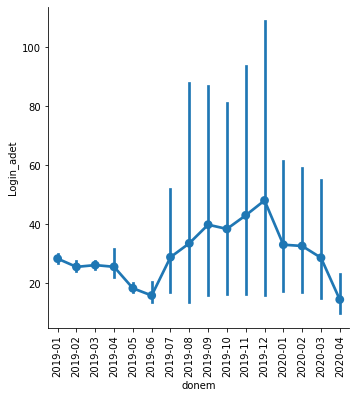

In [16]:
# Her dönem ortalama login sayısı
sns.catplot("donem","Login_adet", data = df_login_donem.sort_values("donem"), kind="point")
plt.xticks(rotation=90);

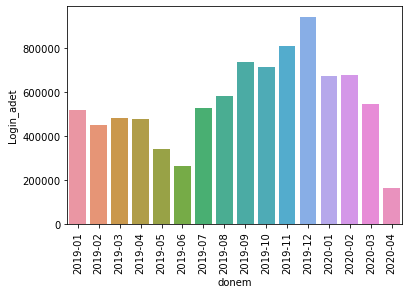

In [17]:
# Her dönem toplam login sayısı
sns.barplot(df_login_donem.groupby("donem")["Login_adet"].sum().index,df_login_donem.groupby("donem")["Login_adet"].sum())
plt.xticks(rotation=90);

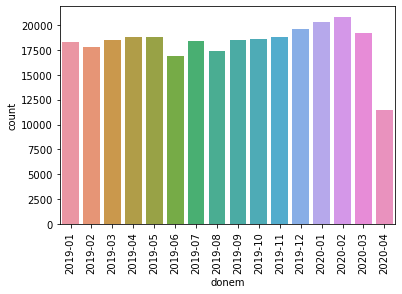

In [18]:
# Her dönemde Login yapan toplam firma sayısı
sns.countplot(x=df_login_donem["donem"].sort_values())
plt.xticks(rotation=90);

### İlan Dönemi Kayıtları

In [19]:
# İlan Dönemi Kayıtları
df_ilan_donem=df.iloc[1:,4:7]
df_ilan_donem.columns=["donem","Firma_kod","ilan_adet"]
df_ilan_donem.dropna(inplace=True)

In [20]:
#Tarihleri Perioda Çevirdim
df_ilan_donem["donem"]=df_ilan_donem["donem"].apply(lambda x: str(x)[0:4]+"-"+str(x)[4:]+"-"+"01")
df_ilan_donem.loc[df_ilan_donem["donem"]=="3008-05-01","donem"]="2019-05-01"
df_ilan_donem["donem"]=pd.to_datetime(df_ilan_donem.donem).dt.to_period('m')

In [21]:
df_ilan_donem.tail()

,donem,Firma_kod,ilan_adet
115433,2019-09,52753,4
115434,2019-10,48616,2
115435,2019-09,119053,6
115436,2019-12,72102,1
115437,2019-06,155973,1


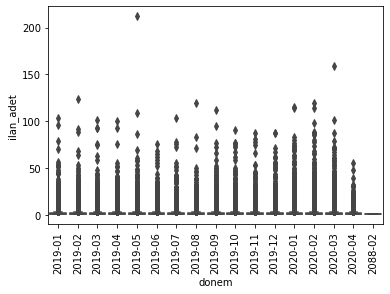

In [22]:
sns.boxplot("donem","ilan_adet", data = df_ilan_donem.sort_values("donem"))
plt.xticks(rotation=90);

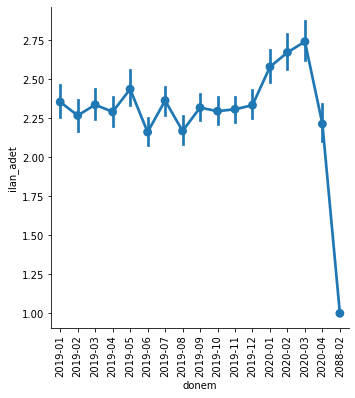

In [23]:
# Her dönemde ortalam ilan sayısı
sns.catplot("donem","ilan_adet", data = df_ilan_donem.sort_values("donem"), kind="point")
plt.xticks(rotation=90);


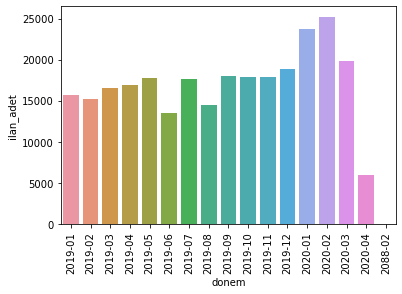

In [24]:
# Her döenmde Toplam İlan Sayısı
sns.barplot(df_ilan_donem.groupby("donem")["ilan_adet"].sum().index,df_ilan_donem.groupby("donem")["ilan_adet"].sum())
plt.xticks(rotation=90);

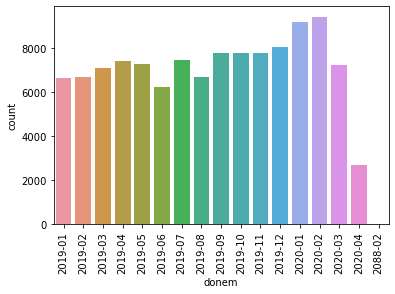

In [25]:
# Her dönemde İaln Veren  toplam firma sayısı
sns.countplot(x=df_ilan_donem["donem"].sort_values())
plt.xticks(rotation=90);

### Sözleşme Dönemi Kayıtları

In [26]:
# Sözleşme Dönemi Kayıtları
df_sozlesme_donem=df.iloc[1:,8:]
df_sozlesme_donem.columns=["Firma_kod","yenileme_donem"]
df_sozlesme_donem.dropna(inplace=True)

In [27]:
# Tarihleri Perioda Çevirdim
df_sozlesme_donem["yenileme_donem"]=df_sozlesme_donem["yenileme_donem"].apply(lambda x: str(x)[0:4]+"-"+str(x)[4:]+"-"+"01")
df_sozlesme_donem["yenileme_donem"]=pd.to_datetime(df_sozlesme_donem.yenileme_donem).dt.to_period('m')

In [28]:
df_sozlesme_donem.tail()

,Firma_kod,yenileme_donem
4384,99602,2020-06
4385,99626,2020-06
4386,99799,2020-05
4387,99963,2020-05
4388,10089,2020-06


In [60]:
# En eski sözleşme tarihi
df_sozlesme_donem["yenileme_donem"].min()

Period('2020-05', 'M')

<AxesSubplot:xlabel='yenileme_donem', ylabel='count'>

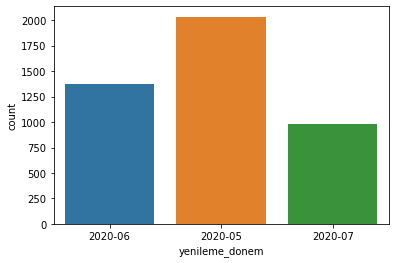

In [59]:
sns.countplot(df_sozlesme_donem["yenileme_donem"])

In [29]:
# login'de kayıt sayısı
df_login_donem.shape

(292292, 3)

In [30]:
#İlandaki kayıt sayısı
df_ilan_donem.shape

(115437, 3)

In [31]:
#Sözleşmedeki kayıt sayısı
df_sozlesme_donem.shape

(4388, 2)

### İlan ve Login Verilerinin Birşeltirilmesi

In [32]:
# İlan ve Login Verilerinin Birşeltirilmesi
df_ilan_login=df_login_donem.merge(df_ilan_donem,how="left",on=["Firma_kod","donem"] )
df_ilan_login.fillna(0,inplace=True)

# Verilerin Uyygun veri tipine dönüştirme
df_ilan_login["Login_adet"]=df_ilan_login["Login_adet"].astype(float)
df_ilan_login["ilan_adet"]=df_ilan_login["ilan_adet"].astype(float)

In [33]:
df_ilan_login.head()

,donem,Firma_kod,Login_adet,ilan_adet
0,2019-08,207104,2.0,0.0
1,2019-10,32850,1.0,0.0
2,2020-02,211761,2.0,1.0
3,2019-12,107276,3.0,0.0
4,2020-02,31690,6.0,2.0


## Matirisn Oluşturulması

In [36]:
# Matrisi Oluşturmak İçin Firma Kodlarına göre Grupby yaptım, ve Login adet ve ilan adet Ortalamalını aldım
df_matrix=df_ilan_login.groupby(["Firma_kod"]).agg({"Login_adet":"mean",
                                   "ilan_adet":"mean"}).reset_index()
df_matrix.fillna(0,inplace=True)

In [37]:
df_matrix.head()

,Firma_kod,Login_adet,ilan_adet
0,1101,511.3125,42.6250
1,1102,58.7500,3.8125
2,1103,50.9375,5.3125
3,1104,196867.0625,18.6875
4,1105,1.0000,0.0000


In [38]:
#Aralıklara Göre firma sayısını bulan fonksiyon
def matrix_df(l1,l2,l3,l4):
    say=df_matrix[((df_matrix["Login_adet"]>=l1) & (df_matrix["Login_adet"]<l2))& ((df_matrix["ilan_adet"]>=l3) & (df_matrix["ilan_adet"]<l4))].shape[0]
    return(say)

In [47]:
# İstenen Matirisin Oluşturulması
matris = pd.DataFrame()

In [53]:
for i1,i2 in [[0,5],[5,10],[10,10**10]]:
    for k1,k2 in [[0,10],[10,100],[100,10**10]]:
        matris.loc[str(k1)+"-"+str(k2),str(i1)+"-"+str(i2)] = matrix_df(k1,k2,i1,i2)
        
matris.index=['0-10', '10-100', '100 +']
matris.columns=['0-5', '5-10', '10 +']

In [56]:
matris

,0-5,5-10,10 +
0-10,41530.0,0.0,1.0
10-100,20532.0,216.0,26.0
100 +,91.0,109.0,154.0


In [57]:
# Sağlamasına baktım, 62659 müşteri vardı ve matside de toplam 62659 müşteri çıktı
matris.sum().sum()

62659.0

## Korelasyonun incelenmesi

**Login Sıklığı ile İlan yayınlama sıklığı arasındaki korelasyonu inceleyelim**

### Genel Topalama göre Korelasyon

In [82]:
# Müşteirlein toplam login ve ilan sıklıklarına göre korelesyonun incelenmesi
df_matrix1[["Login_adet","ilan_adet"]].corr()

,Login_adet,ilan_adet
Login_adet,1.000000,0.078902
ilan_adet,0.078902,1.000000


In [86]:
df_matrix[["Login_adet","ilan_adet"]]

,Login_adet,ilan_adet
0,511.3125,42.6250
1,58.7500,3.8125
2,50.9375,5.3125
3,196867.0625,18.6875
4,1.0000,0.0000
...,...,...
62654,2.0000,0.0000
62655,1.0000,1.0000
62656,6.0000,1.0000
62657,1.0000,1.0000


<AxesSubplot:>

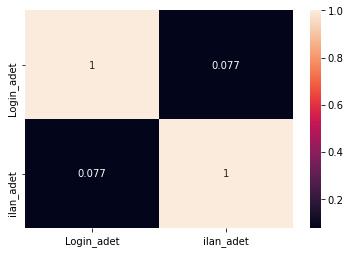

In [65]:
sns.heatmap(df_matrix[["Login_adet","ilan_adet"]].corr(),annot=True)

### Aylık Duruma Göre korelasyo

In [66]:
# Aylık inceleme  İçin Firma Kodlarına göre ve döneme  Grupby yaptım, ve Login adet ve ilan adet Ortalamalını aldım
df_matrix_aylik=df_ilan_login.groupby(["Firma_kod","donem"]).agg({"Login_adet":"mean",
                                   "ilan_adet":"mean"}).reset_index()
df_matrix_aylik.fillna(0,inplace=True)

In [67]:
df_matrix_aylik.head()

,Firma_kod,donem,Login_adet,ilan_adet
0,1101,2019-01,1071.0,45.0
1,1101,2019-02,1367.0,43.0
2,1101,2019-03,1331.0,44.0
3,1101,2019-04,557.0,40.0
4,1101,2019-05,427.0,42.0


In [87]:
# Correlasyon
df_matrix_aylik[["Login_adet","ilan_adet"]].corr()

,Login_adet,ilan_adet
Login_adet,1.000000,0.045243
ilan_adet,0.045243,1.000000


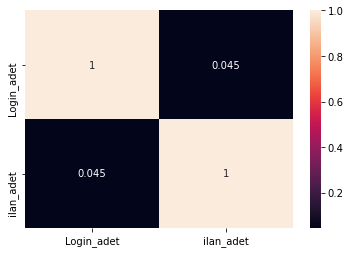

In [88]:
sns.heatmap(df_matrix_aylik[["Login_adet","ilan_adet"]].corr(),annot =True);

# Sözleşme Yenileme Dönemine Göre Curh Analizi

In [69]:
df_sozlesme_donem.head()

,Firma_kod,yenileme_donem
1,100152,2020-06
2,100188,2020-05
3,1102,2020-07
4,10127,2020-06
5,1103,2020-05


### Bütün verinin birleştirilmesi

In [70]:
### Bütün verinin birleştirilmesi
df_all=df_ilan_login.merge(df_sozlesme_donem,how="left",on=["Firma_kod"])

In [71]:
df_all.head()

,donem,Firma_kod,Login_adet,ilan_adet,yenileme_donem
0,2019-08,207104,2.0,0.0,2020-07
1,2019-10,32850,1.0,0.0,NaT
2,2020-02,211761,2.0,1.0,NaT
3,2019-12,107276,3.0,0.0,NaT
4,2020-02,31690,6.0,2.0,2020-05


### Sözleşme Yenileyen firmaların Son giriş dönemleri ve yenileme dönemleri

**İlk girişleri ilk sözleşme zamanı varsayarak hesaplama yapacağım**

In [72]:
# Firmaların Son giriş Döenmleri ve Sözleşme Yenileme Dönemleri
df_firma=df_all.groupby(["Firma_kod"]).agg({"donem":["min","max"],"yenileme_donem":"max"}).reset_index()
df_firma.columns=["Firma_kod","ilk_giris","son_giris","yenileme_donemi"]
df_firma.dropna(inplace=True)
df_firma.head()

,Firma_kod,ilk_giris,son_giris,yenileme_donemi
1,1102,2019-01,2020-04,2020-07
2,1103,2019-01,2020-04,2020-05
3,1104,2019-01,2020-04,2020-06
5,1106,2019-01,2020-04,2020-06
10,1117,2019-01,2020-04,2020-06


In [73]:
# Yenileme Dönemi ile son ve ilk giriş arasındaki farklar
df_firma["yenileme_donem-ilk_giris"]=(df_firma["yenileme_donemi"]-df_firma["ilk_giris"]).apply(attrgetter('n'))
df_firma["yenileme_donem-son_giris"]=(df_firma["yenileme_donemi"]-df_firma["son_giris"]).apply(attrgetter('n'))

In [74]:
df_firma.head()

,Firma_kod,ilk_giris,son_giris,yenileme_donemi,yenileme_donem-ilk_giris,yenileme_donem-son_giris
1,1102,2019-01,2020-04,2020-07,18,3
2,1103,2019-01,2020-04,2020-05,16,1
3,1104,2019-01,2020-04,2020-06,17,2
5,1106,2019-01,2020-04,2020-06,17,2
10,1117,2019-01,2020-04,2020-06,17,2


### 6 aydan kısa dönemde  sözleşme yenileyen firmalar

In [75]:
df_firma[df_firma["yenileme_donem-ilk_giris"]<=6]

,Firma_kod,ilk_giris,son_giris,yenileme_donemi,yenileme_donem-ilk_giris,yenileme_donem-son_giris
258,1709,2020-04,2020-04,2020-05,1,1
444,2238,2019-11,2020-02,2020-05,6,3
807,3128,2019-11,2020-04,2020-05,6,1
1041,3740,2020-02,2020-02,2020-07,5,5
1634,5227,2019-12,2020-03,2020-06,6,3
...,...,...,...,...,...,...
62653,221966,2020-04,2020-04,2020-05,1,1
62654,221968,2020-04,2020-04,2020-05,1,1
62655,221970,2020-04,2020-04,2020-05,1,1
62656,221971,2020-04,2020-04,2020-05,1,1


### 6 ile 12 Ay arasında sözleşme yenileyen firmalar

In [76]:
df_firma[(df_firma["yenileme_donem-ilk_giris"]>6) & (df_firma["yenileme_donem-ilk_giris"]<=12)]

,Firma_kod,ilk_giris,son_giris,yenileme_donemi,yenileme_donem-ilk_giris,yenileme_donem-son_giris
274,1745,2019-07,2020-04,2020-05,10,1
324,1987,2019-07,2020-03,2020-07,12,4
429,2205,2019-05,2020-04,2020-05,12,1
1061,3794,2019-07,2020-03,2020-07,12,4
1113,3929,2019-06,2020-03,2020-06,12,3
...,...,...,...,...,...,...
54131,212722,2019-10,2020-03,2020-06,8,3
54321,212941,2019-10,2020-03,2020-05,7,2
54342,212962,2019-10,2020-04,2020-05,7,1
54364,212988,2019-10,2020-01,2020-05,7,4


### 12 Aydan uzun sürede sözleşme yenileyen firmalar

In [77]:
df_firma[(df_firma["yenileme_donem-ilk_giris"]>12)]

,Firma_kod,ilk_giris,son_giris,yenileme_donemi,yenileme_donem-ilk_giris,yenileme_donem-son_giris
1,1102,2019-01,2020-04,2020-07,18,3
2,1103,2019-01,2020-04,2020-05,16,1
3,1104,2019-01,2020-04,2020-06,17,2
5,1106,2019-01,2020-04,2020-06,17,2
10,1117,2019-01,2020-04,2020-06,17,2
...,...,...,...,...,...,...
48338,206497,2019-06,2020-02,2020-07,13,5
48346,206506,2019-06,2019-12,2020-07,13,7
48467,206633,2019-06,2020-03,2020-07,13,4
48491,206658,2019-06,2020-02,2020-07,13,5
